In [ ]:
print("lda-2022503035")

lda-2022503035


##dataset loading

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("miadul/brain-tumor-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/miadul/brain-tumor-dataset/versions/1


##importing libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA

## class for random forest


In [ ]:
# Random Forest Classifier Model
class RandomForestModel:
    def __init__(self, n_estimators=100, random_state=42):
        self.model = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)

    def train(self, X_train, y_train):
        self.model.fit(X_train, y_train)

    def predict(self, X_test):
        return self.model.predict(X_test)

    def evaluate(self, y_test, y_pred):
        accuracy = accuracy_score(y_test, y_pred)

        # Use 'macro' average for multi-class metrics
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        return accuracy, precision, recall, f1


## class for visualisation

In [ ]:
class DataVisualization:
    @staticmethod
    def visualize_columns(X, y, target_name="MRI_Result"):
        # Visualizing a few columns from the dataset
        df = pd.DataFrame(X)
        df[target_name] = y
        sns.pairplot(df, hue=target_name)
        plt.show()

    @staticmethod
    def plot_accuracy_metrics(accuracy, precision, recall, f1):
        metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
        values = [accuracy, precision, recall, f1]
        plt.bar(metrics, values, color='skyblue')
        plt.ylim(0, 1)
        plt.title("Model Evaluation Metrics")
        plt.show()

    @staticmethod
    def visualize_lda(X_train_lda, X_test_lda, y_train, y_test):
        plt.figure(figsize=(8, 6))
        plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, cmap='viridis', marker='o', label='Train Data')
        plt.scatter(X_test_lda[:, 0], X_test_lda[:, 1], c=y_test, cmap='coolwarm', marker='x', label='Test Data')
        plt.title('LDA Projection of Data')
        plt.xlabel('LD1')
        plt.ylabel('LD2')
        plt.legend()
        plt.show()


## lda

In [ ]:
class LDADimensionalityReduction:
    def __init__(self, n_components=2):
        self.lda = LDA(n_components=n_components)

    def transform(self, X_train, X_test, y_train):
        X_train_lda = self.lda.fit_transform(X_train, y_train)
        X_test_lda = self.lda.transform(X_test)
        return X_train_lda, X_test_lda

## accessing the data using dataframes

In [ ]:
import os
datasetpath = "/root/.cache/kagglehub/datasets/miadul/brain-tumor-dataset/versions/1"
files = os.listdir(datasetpath)
print(files)

import pandas as pd
data = pd.read_csv(os.path.join(datasetpath, files[0]))
data.head()


['brain_tumor_dataset.csv']


,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,4,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,5,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes


In [ ]:
X = data.drop(columns=['MRI_Result', 'Patient_ID', 'Follow_Up_Required'])

# Target variable
y = data['MRI_Result']  # Assuming MRI_Result is a categorical variable (Positive/Negative)

# Encode categorical columns using LabelEncoder
categorical_columns = ['Gender', 'Tumor_Type', 'Location', 'Histology', 'Symptom_1', 'Symptom_2',
                       'Symptom_3', 'Radiation_Treatment', 'Surgery_Performed', 'Chemotherapy',
                       'Family_History', 'Stage']  # Adding Stage to categorical columns

label_encoder = LabelEncoder()

# Apply encoding to all categorical columns
for column in categorical_columns:
    X[column] = label_encoder.fit_transform(X[column])

# Encode target variable ('MRI_Result') to numeric
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Random Forest on the raw dataset
rf_model = RandomForestModel(n_estimators=100)
rf_model.train(X_train, y_train)
y_pred_raw = rf_model.predict(X_test)
accuracy_raw, precision_raw, recall_raw, f1_raw = rf_model.evaluate(y_test, y_pred_raw)

# Apply LDA for dimensionality reduction
lda_model = LDADimensionalityReduction(n_components=2)
X_train_lda, X_test_lda = lda_model.transform(X_train, X_test, y_train)

# Apply Random Forest on the transformed dataset (after LDA)
rf_model_lda = RandomForestModel(n_estimators=100)
rf_model_lda.train(X_train_lda, y_train)
y_pred_lda = rf_model_lda.predict(X_test_lda)
accuracy_lda, precision_lda, recall_lda, f1_lda = rf_model_lda.evaluate(y_test, y_pred_lda)

# Visualize the dataset columns (optional)
DataVisualization.visualize_columns(X, y)

# Visualize LDA projection
DataVisualization.visualize_lda(X_train_lda, X_test_lda, y_train, y_test)

# Plot accuracy metrics for both raw dataset and LDA-transformed dataset
print(f"Raw Dataset Evaluation:\n Accuracy: {accuracy_raw:.4f}, Precision: {precision_raw:.4f}, Recall: {recall_raw:.4f}, F1 Score: {f1_raw:.4f}")
print(f"LDA Dataset Evaluation:\n Accuracy: {accuracy_lda:.4f}, Precision: {precision_lda:.4f}, Recall: {recall_lda:.4f}, F1 Score: {f1_lda:.4f}")

DataVisualization.plot_accuracy_metrics(accuracy_raw, precision_raw, recall_raw, f1_raw)
DataVisualization.plot_accuracy_metrics(accuracy_lda, precision_lda, recall_lda, f1_lda)

ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

100%|██████████| 852k/852k [00:00<00:00, 38.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/miadul/brain-tumor-dataset/versions/1


Accuracy: 0.66
Precision: 0.66
Recall: 0.66
F1 Score: 0.65


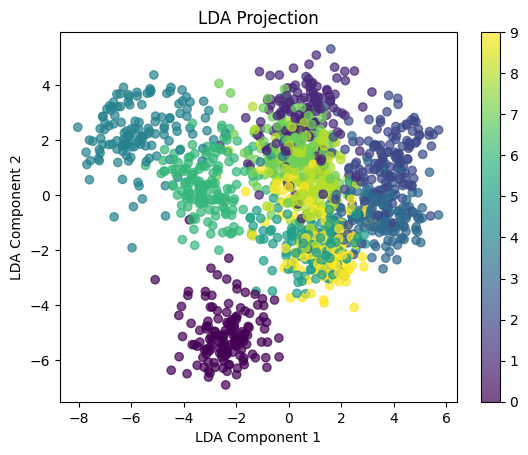

In [1]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA

# Download dataset
path = kagglehub.dataset_download("miadul/brain-tumor-dataset")
print("Path to dataset files:", path)

# Load sample dataset
digits = load_digits()
X = digits.data
y = digits.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_lda, y_train)

y_pred = rf_model.predict(X_test_lda)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Visualization
plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Projection')
plt.colorbar()
plt.show()


In [2]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Download dataset
path = kagglehub.dataset_download("miadul/brain-tumor-dataset")
print("Path to dataset files:", path)

# Load sample dataset
digits = load_digits()
X = digits.data
y = digits.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Path to dataset files: /root/.cache/kagglehub/datasets/miadul/brain-tumor-dataset/versions/1


In [3]:
class RandomForestModel:
    def __init__(self, n_estimators=100, random_state=42):
        self.model = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)

    def train(self, X_train, y_train):
        self.model.fit(X_train, y_train)

    def predict(self, X_test):
        return self.model.predict(X_test)

    def evaluate(self, y_test, y_pred):
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"F1 Score: {f1:.2f}")
        return accuracy, precision, recall, f1

    def show_confusion_matrix(self, y_test, y_pred, title="Confusion Matrix"):
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6,6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(title)
        plt.show()

In [4]:
class LDAProcessor:
    def __init__(self, n_components=2):
        self.lda = LDA(n_components=n_components)

    def fit_transform(self, X_train, y_train):
        return self.lda.fit_transform(X_train, y_train)

    def transform(self, X_test):
        return self.lda.transform(X_test)

In [5]:
class Visualizer:
    @staticmethod
    def plot_lda_projection(X_train_lda, y_train):
        plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, cmap='viridis', alpha=0.7)
        plt.xlabel('LDA Component 1')
        plt.ylabel('LDA Component 2')
        plt.title('LDA Projection')
        plt.colorbar()
        plt.show()

## viuslaising before lda and after lda

Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97


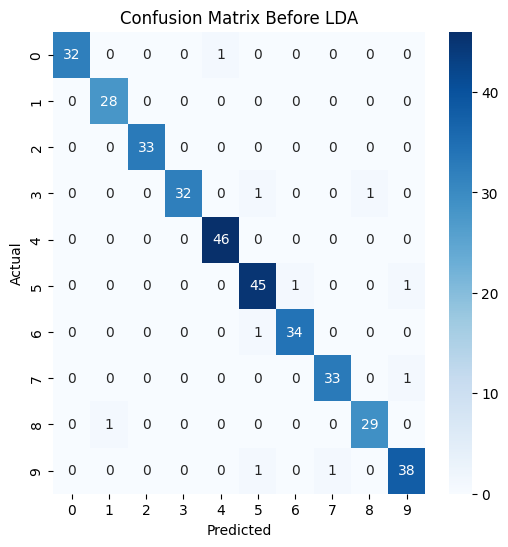

Accuracy: 0.66
Precision: 0.66
Recall: 0.66
F1 Score: 0.65


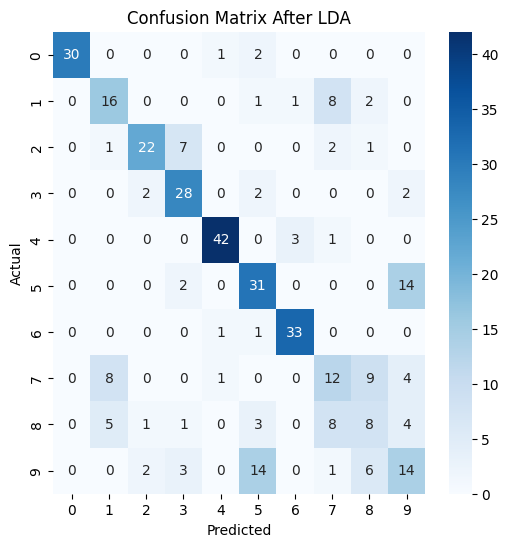

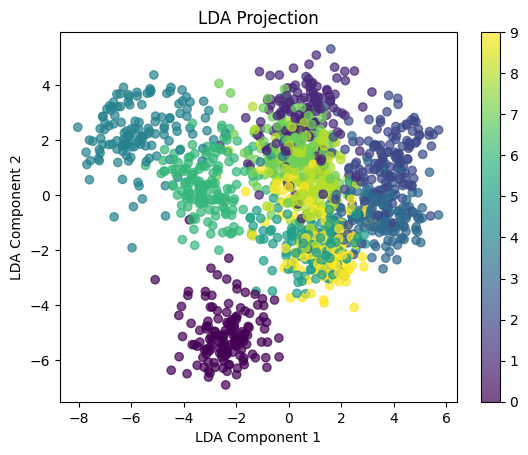

In [6]:
rf_before_lda = RandomForestModel()
rf_before_lda.train(X_train, y_train)
y_pred_before_lda = rf_before_lda.predict(X_test)
rf_before_lda.evaluate(y_test, y_pred_before_lda)
rf_before_lda.show_confusion_matrix(y_test, y_pred_before_lda, title="Confusion Matrix Before LDA")

# Apply LDA
lda_processor = LDAProcessor()
X_train_lda = lda_processor.fit_transform(X_train, y_train)
X_test_lda = lda_processor.transform(X_test)

# Train and evaluate Random Forest after LDA
rf_after_lda = RandomForestModel()
rf_after_lda.train(X_train_lda, y_train)
y_pred_after_lda = rf_after_lda.predict(X_test_lda)
rf_after_lda.evaluate(y_test, y_pred_after_lda)
rf_after_lda.show_confusion_matrix(y_test, y_pred_after_lda, title="Confusion Matrix After LDA")

# Visualization
Visualizer.plot_lda_projection(X_train_lda, y_train)